<a href="https://colab.research.google.com/github/0vv0xtt/math-ua-253-recitation-materials/blob/main/Optimization_Recitation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Nonlinear least squares problem

Suppose someone gives us the Michaelis–Menten model for enzyme kinetics:

$$ y = f(x, a, b) = \frac{ax}{b + x}. $$

In this model $x$ is the input and we want to estimate the parameters $a$ and $b$ given certain N observations $y$.

### Inspection the model
#### a) Plot the true solution 
In this case we know the values of the optimal $a$ and $b$ but right now we want to explore how this function looks. Generate a plot of the function with $0 \leq x \leq 100$ and the optimal parameters.

Text(0, 0.5, 'y')

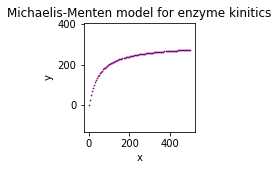

In [ ]:
#define the function
def kin(x,a,b):
  #kinetic model
  return np.divide (a*x,b+x)

# assume we know the true values of a,b

a=300
b=50
x = np.linspace(0,500,100) #plot 100 points btw. 0 and 500

# y = np.zeros(x.shape) from last class
y = kin(x,a,b) # simpler and faster than a for loop

plt.figure (figsize = (2,2))
plt.axis ('equal')
#find a color for the plot
plt.scatter (x,y, s=2, color = 'purple', marker = "." )#s is the size, c is the colour, marker is the shape of the marker
plt.title ("Michaelis-Menten model for enzyme kinitics")
plt.xlabel ("x")
plt.ylabel ("y")

Let $c = (a, b)^\top$ be the vector of parameters and recall Gauss Newton:
$$ c_{n+1} = c_n + \left( Df(c_n)^\top Df(c_n) \right)^{-1}Df(c_n)^\top \left( y - f(c_n) \right) $$

With $N$ number of observations $y$, what is the correct size of the $Df(c_n)$ matrix? Then, what is the correct size of this matrix $\left( Df(c_n)^\top Df(c_n) \right)^{-1}$?  

Let N = 100 as before, program Gauss-Newton method to fit the true observations (the ones we found in the line above).

What are the "ingredients" we need for Gauss-Newton?
   - Jacobian matrix Df(c_n)
   - Initial point, in our case is a point $c_0 = (a_0, b_0)^\top$
   - Some points x (of size N) and some observations y (of size N as well)

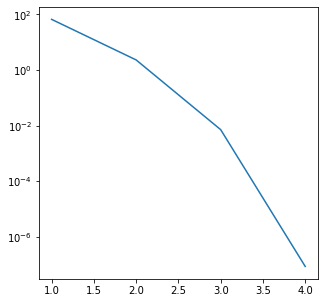

In [ ]:
from numpy.linalg import norm, inv

#need to compute the jacobian
def computeDf(c,x):
  Df = np.zeros ((len(x),len(c))) # initializing a matrix full of zeros 
  Df[:,0] = np.divide (x,c[1]+x) # partial with respect to a
  Df[:,1] = np.divide (-c[0]*x,np.power(c[1]+x,2))
  return Df

#define Gauss-Newton method as function
def GaussNewton(c0,x,y): #c0 is the starting point, 
  maxIter = 1000 #max 1000 iterations
  tol = 1e-2 #
  Df = computeDf(c0, x) #Jacobian at c0
  f = kin(x, *c0.T)
  res = y-f #residual from starting point
  i=1
  c=c0
  res_norms = []
  while (norm (np.matmul(Df.T,res))>tol and i<maxIter):
    #we want to iterate
    c = c+np.matmul(inv(np.matmul(Df.T,Df)), np.matmul(Df.T,np.subtract(y,f)))
    # need to update rest of the variables
    Df = computeDf(c,x)
    f = kin (x, *c.T)
    res = y-f
    i+= 1
    res_norms += [norm(res)] 
  return c, i, res, res_norms
c0 = np.array ([500,70])
c,i, res, res_norms = GaussNewton(c0,x,y)


'''
print ("parameters found using Gauss-Newton: ", c)
print("\nNumber of iterations done", i)
'''
plt.figure ( figsize = (5,5))
plt.plot (range(1,i), res_norms) 
ax = plt.gca()
ax.set_yscale('log')
#range(1, i+1) vector going from 1 to i